# Installing New Libraries

In [1]:
!pip install pandas-profiling

# Importing Libraries

In [31]:
# imports
import pandas as pd
import copy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import kagglehub

# Reading Data from Kaggle

In [32]:
# Download latest version
path = kagglehub.dataset_download("theworldbank/health-nutrition-and-population-statistics")

print("Path to dataset files:", path)

health_df = pd.read_csv(path + '/data.csv')
orig_health_df = copy.deepcopy(health_df)

Path to dataset files: /root/.cache/kagglehub/datasets/theworldbank/health-nutrition-and-population-statistics/versions/1


# Helper Functions

In [17]:
def show_unique_values(df):
    for e in zip(df.columns, df.dtypes):
        col_name, col_dtype = e
        if col_dtype == 'object':
            unique_values = df[col_name].unique()
            print(f"Unique values for column '{col_name}' are {unique_values}")
            print("---------------------------------------------------------------------")

In [29]:
def show_null_values(df):
    df_len = len(df)
    for col in df.columns:
        total_col_null_values = df[col].isnull().sum()
        pct_null_values = np.round(100 * (total_col_null_values / df_len), 2)
        print(f"Column '{col}' has {pct_null_values}% null values ({total_col_null_values} out of {df_len}).")
        print("---------------------------------------------------------------------")

In [76]:
def show_null_values_per_country(df, ind_col, col, country):
    df_len = len(df)
    total_col_null_values = df[col].isnull().sum()
    pct_null_values = np.round(100 * (total_col_null_values / df_len), 2)
    print(f"For country {country} indicator column '{ind_col}' has {pct_null_values}% null values ({total_col_null_values} out of {df_len}).")
    print("---------------------------------------------------------------------")

# Exploratory Data Analysis

In [4]:
health_df.shape

(89010, 61)

In [5]:
health_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', 'Unnamed: 60'],
      dtype='object')

In [10]:
health_df.dtypes

,0
Country Name,object
Country Code,object
Indicator Name,object
Indicator Code,object
1960,float64
...,...
2012,float64
2013,float64
2014,float64
2015,float64


In [33]:
health_df.drop(columns=['Unnamed: 60'], inplace=True)

In [34]:
health_df.describe().T

,count,mean,std,min,25%,50%,75%,max
1960,35482.0,4.398856e+06,4.948245e+07,-2.374024e+00,19.079750,5282.000000,99935.25,3.035056e+09
1961,35325.0,4.477329e+06,5.013205e+07,-2.498824e+00,21.300000,5794.000000,103400.00,3.076121e+09
1962,35889.0,4.483279e+06,5.054473e+07,-3.826648e+06,17.900000,5158.000000,102584.00,3.129064e+09
1963,35452.0,4.634875e+06,5.192122e+07,-3.206682e+00,22.282000,5945.000000,107848.75,3.193947e+09
1964,35483.0,4.727806e+06,5.297849e+07,-3.078607e+00,22.368766,6065.000000,110750.00,3.259355e+09
1965,35603.0,4.810557e+06,5.401988e+07,-2.978527e+00,20.133567,5998.000000,112576.50,3.326054e+09
1966,35538.0,4.923225e+06,5.526006e+07,-3.072258e+00,21.964392,6240.000000,115631.25,3.395866e+09
1967,36022.0,4.958680e+06,5.607026e+07,-4.094255e+06,17.797230,5767.000000,115188.75,3.465297e+09
1968,35577.0,5.126162e+06,5.763263e+07,-4.263603e+00,22.266000,6438.000000,121197.00,3.535512e+09
1969,35630.0,5.229267e+06,5.887277e+07,-4.645452e+00,22.372339,6529.500000,124361.50,3.609910e+09


In [35]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89010 entries, 0 to 89009
Data columns (total 60 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    89010 non-null  object 
 1   Country Code    89010 non-null  object 
 2   Indicator Name  89010 non-null  object 
 3   Indicator Code  89010 non-null  object 
 4   1960            35482 non-null  float64
 5   1961            35325 non-null  float64
 6   1962            35889 non-null  float64
 7   1963            35452 non-null  float64
 8   1964            35483 non-null  float64
 9   1965            35603 non-null  float64
 10  1966            35538 non-null  float64
 11  1967            36022 non-null  float64
 12  1968            35577 non-null  float64
 13  1969            35630 non-null  float64
 14  1970            36910 non-null  float64
 15  1971            37578 non-null  float64
 16  1972            38015 non-null  float64
 17  1973            37542 non-null 

In [36]:
show_null_values(health_df)

Column 'Country Name' has 0.0% null values (0 out of 89010).
---------------------------------------------------------------------
Column 'Country Code' has 0.0% null values (0 out of 89010).
---------------------------------------------------------------------
Column 'Indicator Name' has 0.0% null values (0 out of 89010).
---------------------------------------------------------------------
Column 'Indicator Code' has 0.0% null values (0 out of 89010).
---------------------------------------------------------------------
Column '1960' has 60.14% null values (53528 out of 89010).
---------------------------------------------------------------------
Column '1961' has 60.31% null values (53685 out of 89010).
---------------------------------------------------------------------
Column '1962' has 59.68% null values (53121 out of 89010).
---------------------------------------------------------------------
Column '1963' has 60.17% null values (53558 out of 89010).
--------------------------

In [37]:
show_unique_values(health_df)

Unique values for column 'Country Name' are ['Arab World' 'Caribbean small states' 'Central Europe and the Baltics'
 'Early-demographic dividend' 'East Asia & Pacific'
 'East Asia & Pacific (excluding high income)'
 'East Asia & Pacific (IDA & IBRD countries)' 'Euro area'
 'Europe & Central Asia' 'Europe & Central Asia (excluding high income)'
 'Europe & Central Asia (IDA & IBRD countries)' 'European Union'
 'Fragile and conflict affected situations'
 'Heavily indebted poor countries (HIPC)' 'High income'
 'Late-demographic dividend' 'Latin America & Caribbean'
 'Latin America & Caribbean (excluding high income)'
 'Latin America & the Caribbean (IDA & IBRD countries)'
 'Least developed countries: UN classification' 'Low & middle income'
 'Low income' 'Lower middle income' 'Middle East & North Africa'
 'Middle East & North Africa (excluding high income)'
 'Middle East & North Africa (IDA & IBRD countries)' 'Middle income'
 'North America' 'OECD members' 'Other small states'
 'Pacific is

In [67]:
health_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Arab World,ARB,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,133.555013,134.159119,134.857912,134.504576,134.105211,133.569626,...,50.329135,49.999851,49.887046,49.781207,49.672975,49.536047,49.383745,48.796558,48.196418,NaN
3,Arab World,ARB,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
health_df.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
89005,Zimbabwe,ZWE,Use of insecticide-treated bed nets (% of unde...,SH.MLR.NETS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.100000,NaN,NaN,17.300000,NaN,9.700000,NaN,NaN,26.800000,NaN
89006,Zimbabwe,ZWE,Use of Intermittent Preventive Treatment of ma...,SH.MLR.SPF2.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.300000,NaN,NaN,13.900000,NaN,7.300000,NaN,NaN,12.900000,NaN
89007,Zimbabwe,ZWE,Vitamin A supplementation coverage rate (% of ...,SN.ITK.VITA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,67.000000,83.000000,0.000000,77.000000,49.000000,47.000000,61.00000,34.000000,32.000000,NaN
89008,Zimbabwe,ZWE,Wanted fertility rate (births per woman),SP.DYN.WFRT,NaN,NaN,NaN,NaN,NaN,NaN,...,3.300000,NaN,NaN,NaN,NaN,3.500000,NaN,NaN,NaN,NaN
89009,Zimbabwe,ZWE,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,58.331272,58.586086,58.760796,58.812421,58.825943,58.899308,58.93908,58.900126,58.822335,58.855551


In [ ]:
'''
profile = ProfileReport(health_df, title="Profiling Report")
profile
'''

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [48]:
# There are 258 countries and 345 indicator columns.
len(health_df['Country Name'].unique()), len(health_df['Indicator Name'].unique())

(258, 345)

# Observations



1.   Dataframe is wide.
2.   Not all year-country-indicator column is populated.
3.   Country Name includes both individual countries and conglomerates. Ex. Arab World.



# Data Processing

In [68]:
country_name_list = ['Afghanistan',
                     'Albania',
                     'Algeria',
                     'American Samoa',
                     'Andorra',
                     'Angola',
                     'Antigua and Barbuda',
                     'Argentina',
                     'Armenia',
                     'Aruba',
                     'Australia',
                     'Austria',
                     'Azerbaijan',
                     'Bahamas, The',
                     'Bahrain',
                     'Bangladesh',
                     'Barbados',
                     'Belarus',
                     'Belgium',
                     'Belize',
                     'Benin',
                     'Bermuda',
                     'Bhutan',
                     'Bolivia',
                     'Bosnia and Herzegovina',
                     'Botswana',
                     'Brazil',
                     'British Virgin Islands',
                     'Brunei Darussalam',
                     'Bulgaria',
                     'Burkina Faso',
                     'Burundi',
                     'Cabo Verde',
                     'Cambodia',
                     'Cameroon',
                     'Canada',
                     'Cayman Islands',
                     'Central African Republic',
                     'Chad',
                     'Channel Islands',
                     'Chile',
                     'China',
                     'Colombia',
                     'Comoros',
                     'Congo, Dem. Rep.',
                     'Congo, Rep.',
                     'Costa Rica',
                     "Cote d'Ivoire",
                     'Croatia',
                     'Cuba',
                     'Curacao',
                     'Cyprus',
                     'Czech Republic',
                     'Denmark',
                     'Djibouti',
                     'Dominica',
                     'Dominican Republic',
                     'Ecuador',
                     'Egypt, Arab Rep.',
                     'El Salvador',
                     'Equatorial Guinea',
                     'Eritrea',
                     'Estonia',
                     'Ethiopia',
                     'Faroe Islands',
                     'Fiji',
                     'Finland',
                     'France',
                     'French Polynesia',
                     'Gabon',
                     'Gambia, The',
                     'Georgia',
                     'Germany',
                     'Ghana',
                     'Gibraltar',
                     'Greece',
                     'Greenland',
                     'Grenada',
                     'Guam',
                     'Guatemala',
                     'Guinea',
                     'Guinea-Bissau',
                     'Guyana',
                     'Haiti',
                     'Honduras',
                     'Hong Kong SAR, China',
                     'Hungary',
                     'Iceland',
                     'India',
                     'Indonesia',
                     'Iran, Islamic Rep.',
                     'Iraq',
                     'Ireland',
                     'Isle of Man',
                     'Israel',
                     'Italy',
                     'Jamaica',
                     'Japan',
                     'Jordan',
                     'Kazakhstan',
                     'Kenya',
                     'Kiribati',
                     'Korea, Dem. People’s Rep.',
                     'Korea, Rep.',
                     'Kosovo',
                     'Kuwait',
                     'Kyrgyz Republic',
                     'Lao PDR',
                     'Latvia',
                     'Lebanon',
                     'Lesotho',
                     'Liberia',
                     'Libya',
                     'Liechtenstein',
                     'Lithuania',
                     'Luxembourg',
                     'Macao SAR, China',
                     'Macedonia, FYR',
                     'Madagascar',
                     'Malawi',
                     'Malaysia',
                     'Maldives',
                     'Mali',
                     'Malta',
                     'Marshall Islands',
                     'Mauritania',
                     'Mauritius',
                     'Mexico',
                     'Micronesia, Fed. Sts.',
                     'Moldova',
                     'Monaco',
                     'Mongolia',
                     'Montenegro',
                     'Morocco',
                     'Mozambique',
                     'Myanmar',
                     'Namibia',
                     'Nauru',
                     'Nepal',
                     'Netherlands',
                     'New Caledonia',
                     'New Zealand',
                     'Nicaragua',
                     'Niger',
                     'Nigeria',
                     'Northern Mariana Islands',
                     'Norway',
                     'Oman',
                     'Pakistan',
                     'Palau',
                     'Panama',
                     'Papua New Guinea',
                     'Paraguay',
                     'Peru',
                     'Philippines',
                     'Poland',
                     'Portugal',
                     'Puerto Rico',
                     'Qatar',
                     'Romania',
                     'Russian Federation',
                     'Rwanda',
                     'Samoa',
                     'San Marino',
                     'Sao Tome and Principe',
                     'Saudi Arabia',
                     'Senegal',
                     'Serbia',
                     'Seychelles',
                     'Sierra Leone',
                     'Singapore',
                     'Sint Maarten (Dutch part)',
                     'Slovak Republic',
                     'Slovenia',
                     'Solomon Islands',
                     'Somalia',
                     'South Africa',
                     'South Sudan',
                     'Spain',
                     'Sri Lanka',
                     'St. Kitts and Nevis',
                     'St. Lucia',
                     'St. Martin (French part)',
                     'St. Vincent and the Grenadines',
                     'Sudan',
                     'Suriname',
                     'Swaziland',
                     'Sweden',
                     'Switzerland',
                     'Syrian Arab Republic',
                     'Tajikistan',
                     'Tanzania',
                     'Thailand',
                     'Timor-Leste',
                     'Togo',
                     'Tonga',
                     'Trinidad and Tobago',
                     'Tunisia',
                     'Turkey',
                     'Turkmenistan',
                     'Turks and Caicos Islands',
                     'Tuvalu',
                     'Uganda',
                     'Ukraine',
                     'United Arab Emirates',
                     'United Kingdom',
                     'United States',
                     'Uruguay',
                     'Uzbekistan',
                     'Vanuatu',
                     'Venezuela, RB',
                     'Vietnam',
                     'Virgin Islands (U.S.)',
                     'West Bank and Gaza',
                     'Yemen, Rep.',
                     'Zambia',
                     'Zimbabwe'
                     ]

In [69]:
year_cols = [str(x) for x in list(range(1960, 2015))]

In [71]:
id_cols = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
country_year_health_df = pd.melt(health_df[health_df['Country Name'].isin(country_name_list)], id_vars = id_cols, value_vars = year_cols)
country_year_health_df.rename(columns={'variable' : 'Year', 'value' : 'Indicator Value'}, inplace=True)
country_year_health_df

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Indicator Value
0,Afghanistan,AFG,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,1960,NaN
1,Afghanistan,AFG,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,1960,NaN
2,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,145.321000
3,Afghanistan,AFG,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,1960,NaN
4,Afghanistan,AFG,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,1960,NaN
...,...,...,...,...,...,...
4117570,Zimbabwe,ZWE,Use of insecticide-treated bed nets (% of unde...,SH.MLR.NETS.ZS,2014,26.800000
4117571,Zimbabwe,ZWE,Use of Intermittent Preventive Treatment of ma...,SH.MLR.SPF2.ZS,2014,12.900000
4117572,Zimbabwe,ZWE,Vitamin A supplementation coverage rate (% of ...,SN.ITK.VITA.ZS,2014,32.000000
4117573,Zimbabwe,ZWE,Wanted fertility rate (births per woman),SP.DYN.WFRT,2014,NaN


In [ ]:
for country in country_year_health_df['Country Name'].unique():
    for ind_col in country_year_health_df['Indicator Name'].unique():
        temp_df = country_year_health_df[(country_year_health_df['Country Name'] == country) \
                                         & \
                                         (country_year_health_df['Indicator Name'] == ind_col)]
        show_null_values_per_country(df = temp_df,
                                     ind_col = ind_col,
                                     col = 'Indicator Value',
                                     country = country
                                    )
    print("********************************************************************")

Streaming output truncated to the last 5000 lines.
---------------------------------------------------------------------
For country Argentina indicator column 'Population ages 65-69, male (% of male population)' has 0.0% null values (0 out of 55).
---------------------------------------------------------------------
For country Argentina indicator column 'Population ages 70-74, female (% of female population)' has 0.0% null values (0 out of 55).
---------------------------------------------------------------------
For country Argentina indicator column 'Population ages 70-74, male (% of male population)' has 0.0% null values (0 out of 55).
---------------------------------------------------------------------
For country Argentina indicator column 'Population ages 75-79, female (% of female population)' has 0.0% null values (0 out of 55).
---------------------------------------------------------------------
For country Argentina indicator column 'Population ages 75-79, male (% of male 

# Considerations



1.   Consider to shift timeline
2.   Check the KPI column population per country to decide, consider a threshold where for a particular KPI, if x countries have populated data which is above the threshold, consider it.



# Research Questions

Which features affect "Life expectancy at birth, total (years)" across different regions and socio economic conditions ('High income', 'Middle income', 'Low & middle income', 'Lower middle income', 'Low income')?

# Exploratory Data Analysis - Matt

In [ ]:
pd.set_option('display.max_columns', None)
# health_df[health_df['Indicator Name'] == 'Literacy rate, youth total (% of people ages 15-24)'].info()

In [ ]:
income_range_df = health_df[health_df['Country Name'].isin(['High income', 'Low & middle income', ' Lower middle income', 'Low income', 'Middle income'])]
display(income_range_df.shape, income_range_df.head())

(1380, 61)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
4830,High income,HIC,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4831,High income,HIC,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4832,High income,HIC,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,45.549696,45.491697,45.403564,44.656987,43.906174,43.213944,42.647225,42.137932,41.801175,41.362272,40.92797,40.458585,39.909994,39.121149,38.230433,37.297257,36.346829,35.318598,34.543327,33.741044,32.923439,32.108524,31.294906,30.71035,30.104792,29.486094,28.861251,28.22056,28.086178,28.000282,28.01122,28.115929,28.349426,27.803056,27.241214,26.62434,25.94562,25.207395,24.722365,24.210005,23.686164,23.138583,22.552788,22.312953,22.042049,21.755774,21.471943,21.191229,20.426066,19.631547,18.807792,17.98022,17.119867,15.82732,14.55289,NaN,NaN
4833,High income,HIC,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4834,High income,HIC,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ed_indicators = ['Comprehensive correct knowledge of HIV/AIDS, ages 15-24, female (2 prevent ways and reject 3 misconceptions)',
                'Comprehensive correct knowledge of HIV/AIDS, ages 15-24, male (2 prevent ways and reject 3 misconceptions)',
                'Literacy rate, adult female (% of females ages 15 and above)',
                'Literacy rate, adult male (% of males ages 15 and above)',
                'Literacy rate, adult total (% of people ages 15 and above)',
                'Literacy rate, youth male (% of males ages 15-24)',
                'Literacy rate, youth total (% of people ages 15-24)',
                'Primary completion rate, female (% of relevant age group)',
                'Primary completion rate, male (% of relevant age group)',
                'Primary completion rate, total (% of relevant age group)',
                'Public spending on education, total (% of GDP)',
                'Ratio of school attendance of orphans to school attendance of non-orphans ages 10-14',
                'Ratio of young literate females to males (% ages 15-24)',
                'School enrollment, primary (% gross)',
                'School enrollment, primary (% net)',
                'School enrollment, primary, female (% gross)',
                'School enrollment, primary, female (% net)',
                'School enrollment, primary, male (% gross)',
                'School enrollment, primary, male (% net)',
                'School enrollment, secondary (% gross)',
                'School enrollment, secondary (% net)',
                'School enrollment, secondary, female (% gross)',
                'School enrollment, secondary, female (% net)',
                'School enrollment, secondary, male (% gross)',
                'School enrollment, secondary, male (% net)',
                'School enrollment, tertiary (% gross)',
                'School enrollment, tertiary, female (% gross)']

In [ ]:
# set number of rows to display
pd.set_option('display.max_rows', 150)
# drop all columns prior to 1970
columns_to_drop = [str(year) for year in range(1960, 1970)]
# income_range_df = income_range_df.drop(columns=columns_to_drop)
ed_df = income_range_df[income_range_df['Indicator Name'].isin(ed_indicators)].drop(columns=['Country Code', 'Indicator Code'])
ed_df
li_ed_df = ed_df[ed_df['Country Name'] == 'Low income'].drop(columns=['2014', '2015', 'Unnamed: 60'])
li_ed_df

,Country Name,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
7327,Low income,"Comprehensive correct knowledge of HIV/AIDS, a...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7328,Low income,"Comprehensive correct knowledge of HIV/AIDS, a...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7396,Low income,"Literacy rate, adult female (% of females ages...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.79306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.01191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.99831,NaN,NaN,NaN
7397,Low income,"Literacy rate, adult male (% of males ages 15 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.84179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.21960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.46153,NaN,NaN,NaN
7398,Low income,"Literacy rate, adult total (% of people ages 1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.02174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.76149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.49614,NaN,NaN,NaN
7399,Low income,"Literacy rate, youth male (% of males ages 15-24)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.85557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.80733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.84805,NaN,NaN,NaN
7400,Low income,"Literacy rate, youth total (% of people ages 1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.50978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.02234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.09952,NaN,NaN,NaN
7539,Low income,"Primary completion rate, female (% of relevant...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.48152,27.56488,28.04359,28.88792,29.83085,29.49147,30.70686,32.63096,33.52002,34.69427,35.99437,37.41938,40.05776,38.64462,39.12955,39.14550,38.91526,38.65518,39.98680,41.36105,41.51345,42.86777,42.63302,43.11028,43.59318,43.80994,44.34558,46.00726,46.95071,48.78275,50.59948,52.31425,53.99283,56.80042,58.91962,60.20192,62.11959,65.252700,66.35794,68.515270,69.37691,69.50674
7540,Low income,"Primary completion rate, male (% of relevant a...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.17319,47.40165,48.38208,49.22557,46.77560,47.67185,49.24364,49.60132,50.25497,50.90911,51.71731,53.94381,51.91633,51.94365,51.62231,51.17416,50.83408,52.01592,52.79439,52.88102,53.73157,53.06941,53.14500,53.12542,52.92846,53.13841,54.35165,55.59311,57.48698,59.51991,61.07527,62.48362,64.66859,65.92066,66.81107,68.31596,70.965060,70.75433,72.512240,72.95303,72.49038
7541,Low income,"Primary completion rate, total (% of relevant ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.93452,35.85355,36.25744,37.44689,37.80077,38.71518,39.60971,38.20384,39.25682,41.00270,41.62434,42.53615,43.51125,44.62544,47.05737,45.33549,45.59110,45.43674,45.09561,44.79456,46.05233,47.12551,47.24481,48.34558,47.89675,48.17437,48.40652,48.41270,48.78399,50.22057,51.31617,53.18233,55.10728,56.74077,58.28270,60.77587,62.45696,63.54024,65.25022,68.139410,68.58025,70.535790,71.18371,71.01375


In [ ]:
li_lit_df = li_ed_df[li_ed_df['Indicator Name'].isin([
    'Literacy rate, adult female (% of females ages 15 and above)',
    'Literacy rate, adult male (% of males ages 15 and above)',
    'Literacy rate, adult total (% of people ages 15 and above)',
    'Literacy rate, youth male (% of males ages 15-24)',
    'Literacy rate, youth total (% of people ages 15-24)',
    'Literacy rate, youth female (% of females ages 15-24)'
])].dropna(axis=1).drop(columns='Country Name').set_index('Indicator Name')
li_lit_df

,1990,2000,2010
Indicator Name,,,
"Literacy rate, adult female (% of females ages 15 and above)",36.79306,44.01191,48.99831
"Literacy rate, adult male (% of males ages 15 and above)",57.84179,64.21960,66.46153
"Literacy rate, adult total (% of people ages 15 and above)",47.02174,53.76149,57.49614
"Literacy rate, youth male (% of males ages 15-24)",64.85557,70.80733,73.84805
"Literacy rate, youth total (% of people ages 15-24)",56.50978,63.02234,68.09952


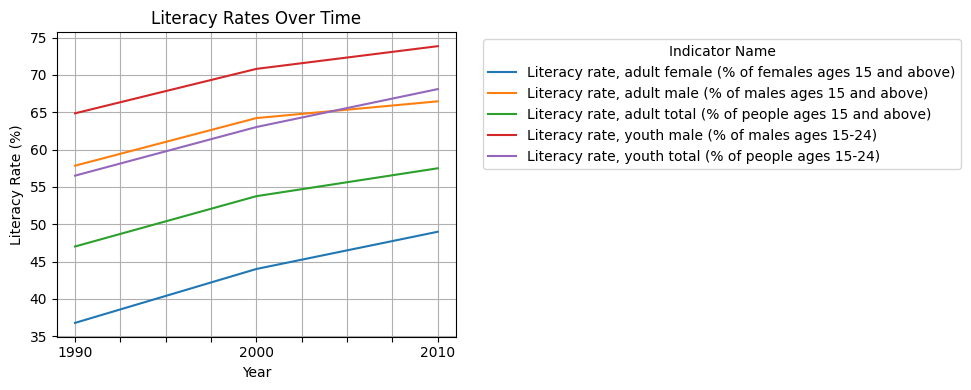

In [ ]:
df = li_lit_df.transpose()
df.plot(kind='line', figsize=(10, 4))
plt.xlabel('Year')
plt.ylabel('Literacy Rate (%)')
plt.title('Literacy Rates Over Time')
plt.legend(title='Indicator Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Let's look at formal education

In [ ]:
primary_completion_df = li_ed_df[li_ed_df['Indicator Name'].isin([
    'Primary completion rate, female (% of relevant age group)',
    'Primary completion rate, male (% of relevant age group)',
    'Primary completion rate, total (% of relevant age group)'
])].dropna(axis=1).drop(columns='Country Name').set_index('Indicator Name')
# primary_completion_df

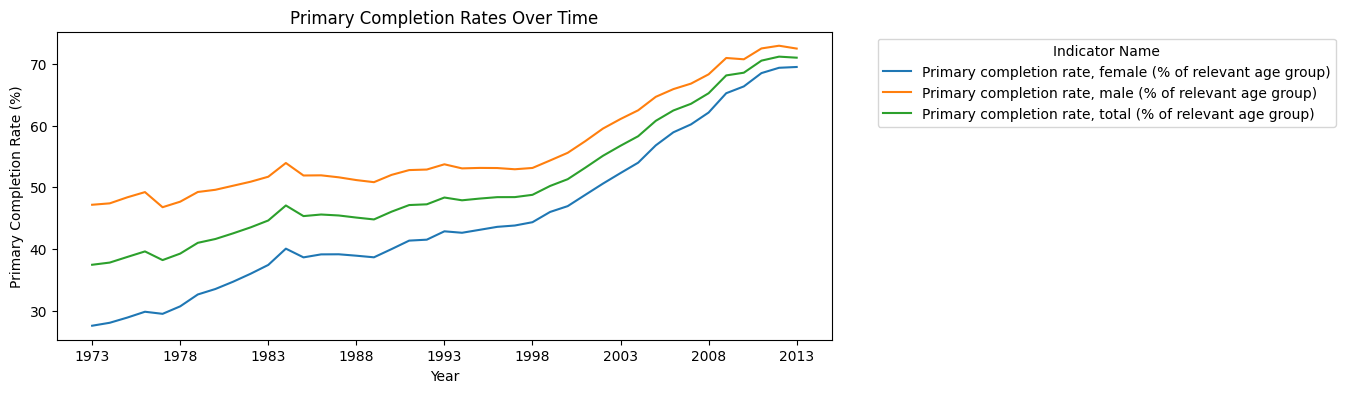

In [ ]:
df = primary_completion_df.transpose()
df.plot(kind='line', figsize=(10, 4))
plt.title('Primary Completion Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Primary Completion Rate (%)')
plt.legend(title='Indicator Name', bbox_to_anchor=(1.05, 1), loc='upper left')

In [ ]:
li_gni_df = health_df[health_df['Country Name'] == 'Low income']
li_gni_df = li_gni_df[li_gni_df['Indicator Name'] == 'GNI per capita, Atlas method (current US$)']
columns_to_drop = [str(year) for year in range(1960, 1988)]
li_gni_df = li_gni_df.drop(columns=['Country Code', 'Indicator Code', 'Country Name', 'Unnamed: 60']).drop(columns=columns_to_drop)
li_gni_df.set_index('Indicator Name', inplace=True)
# li_gni_df

Text(0, 0.5, 'GNI per Capita')

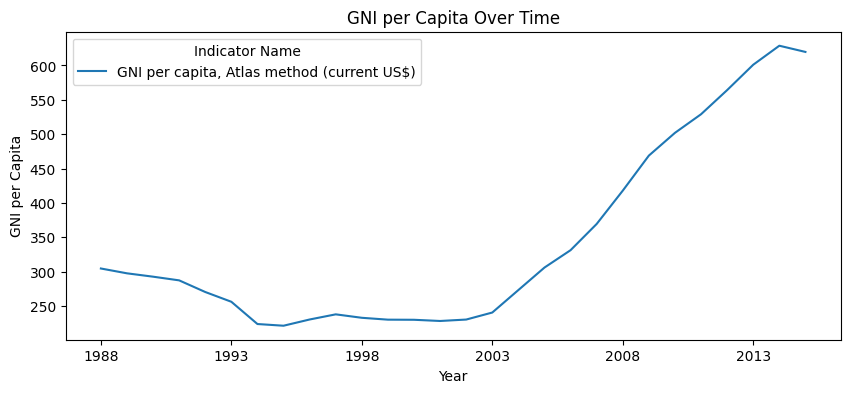

In [ ]:
li_gni_df = li_gni_df.transpose()
li_gni_df.plot(kind='line', figsize=(10, 4))
plt.title('GNI per Capita Over Time')
plt.xlabel('Year')
plt.ylabel('GNI per Capita')


In [ ]:
health_df[health_df['Indicator Name'] == 'GNI per capita, Atlas method (current US$)'].describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
count,0.0,0.0,96.000000,97.000000,99.000000,101.000000,102.000000,113.000000,119.000000,121.000000,127.000000,127.000000,139.000000,140.000000,140.000000,139.000000,139.000000,142.000000,144.000000,149.000000,149.000000,150.000000,161.000000,165.000000,167.000000,167.000000,170.000000,172.000000,174.000000,177.000000,177.000000,178.000000,193.000000,199.000000,202.000000,211.000000,212.000000,219.000000,219.000000,219.000000,223.000000,224.000000,227.000000,229.000000,235.000000,235.000000,236.000000,237.000000,235.000000,233.000000,231.000000,231.000000,230.000000,229.000000,223.000000,206.000000,0.0
mean,NaN,NaN,568.409366,594.748001,638.088124,679.738614,729.651406,785.433792,814.924602,860.945168,949.580444,1037.135611,1371.686716,1671.577691,2073.135428,2450.710883,2668.656484,2803.989555,3109.120036,3665.133712,4306.690414,4468.695542,4158.647678,3769.501917,3726.076705,3757.350537,4126.535893,4863.507550,5803.139047,6096.708842,6248.918340,6494.600204,6611.551844,6538.340962,6696.448974,7005.408291,7252.230932,7357.511799,7113.311585,7105.995897,7335.098957,7339.363790,7253.243767,7913.917784,9305.939366,10628.359406,11500.054904,13127.764454,13949.106040,12829.871170,12547.546022,12921.857541,13778.518847,14244.089446,13445.549988,13349.573456,NaN
std,NaN,NaN,697.905637,728.604575,779.886733,840.742457,918.954642,990.576369,1039.758661,1106.306021,1188.803764,1300.655531,1959.429172,2440.119258,2983.047578,3482.551931,3801.658323,4034.869341,4520.354033,5400.175572,6333.830147,6410.516000,5850.420201,5256.846881,5149.518505,5207.149971,5912.756729,7299.114031,9148.325232,9652.678801,10118.609204,10511.563752,11213.035510,11084.496264,11487.777090,12128.562433,12720.439429,12646.828985,12093.986995,12024.952118,12275.121322,11902.179120,11631.899265,12750.253784,15074.301950,17191.802190,18367.330537,21404.892707,22797.358039,19032.675488,18166.949875,18439.825194,19215.261652,19942.573805,18742.108905,17795.774275,NaN
min,NaN,NaN,40.000000,40.000000,40.000000,40.000000,40.000000,50.000000,50.000000,50.000000,60.000000,60.000000,60.000000,70.000000,80.000000,100.000000,120.000000,120.000000,120.000000,130.000000,140.000000,160.000000,140.000000,140.000000,150.000000,160.000000,150.000000,150.000000,160.000000,160.000000,130.000000,110.000000,130.000000,170.000000,150.000000,140.000000,130.000000,120.000000,120.000000,100.000000,120.000000,120.000000,120.000000,80.000000,90.000000,120.000000,130.000000,160.000000,170.000000,180.000000,200.000000,220.000000,240.000000,250.000000,270.000000,260.000000,NaN
25%,NaN,NaN,122.202963,129.315534,135.433595,143.958896,150.000000,160.000000,165.000000,172.553012,192.241638,198.749840,221.210101,256.121240,327.500000,370.000000,400.000000,432.781414,459.593774,537.683672,630.000000,694.287220,610.000000,550.000000,480.000000,469.455169,502.500000,532.500000,542.500000,520.000000,550.000000,510.000000,560.000000,548.751622,502.500000,544.648557,563.890471,600.000000,585.000000,605.000000,590.000000,587.500000,575.000000,640.000000,752.778710,900.000000,968.150425,1028.205026,1183.682048,1260.000000,1305.000000,1460.000000,1700.000000,1830.000000,1850.000000,1950.000000,NaN
50%,NaN,NaN,255.000000,250.000000,270.000000,280.000000,290.000000,300.000000,300.000000,330.000000,350.000000,380.000000,480.000000,560.000000,720.000000,910.000000,980.000000,1020.000000,1210.000000,1370.000000,1700.000000,1835.000000,1740.000000,1400.000000,1360.000000,1380.000000,1450.000000,1645.000000,1825.000000,1890.000000,1610.000000,1710.000000,1600.000000,1590.000000,1735.000000,1903.987945,1962.308568,2110.000000,1961.389689,1960.000000,1870.534302,1878.602078,1960.000000,2190.000000,2590.000000,3070.000000,3495.000

In [ ]:
health_indicators = ['Prevalence of anemia among children (% of children under 5)',
       'Prevalence of anemia among non-pregnant women (% of women ages 15-49)',
       'Prevalence of anemia among pregnant women (%)',
       'Prevalence of anemia among women of reproductive age (% of women ages 15-49)',
       'Prevalence of HIV, female (% ages 15-24)',
       'Prevalence of HIV, male (% ages 15-24)',
       'Prevalence of HIV, total (% of population ages 15-49)',
       'Prevalence of overweight (% of adults)',
       'Prevalence of overweight (% of children under 5)',
       'Prevalence of overweight, female (% of children under 5)',
       'Prevalence of overweight, female (% of female adults)',
       'Prevalence of overweight, male (% of children under 5)',
       'Prevalence of overweight, male (% of male adults)',
       'Prevalence of severe wasting, weight for height (% of children under 5)',
       'Prevalence of severe wasting, weight for height, female (% of children under 5)',
       'Prevalence of severe wasting, weight for height, male (% of children under 5)',
       'Prevalence of syphilis (% of women attending antenatal care)',
       'Prevalence of tuberculosis (per 100,000 population)',
       'Prevalence of undernourishment (% of population)',
       'Prevalence of wasting (% of children under 5)',
       'Prevalence of wasting, female (% of children under 5)',
       'Prevalence of wasting, male (% of children under 5)',
       'Malnutrition prevalence, height for age (% of children under 5)',
       'Malnutrition prevalence, height for age, female (% of children under 5)',
       'Malnutrition prevalence, height for age, male (% of children under 5)',
       'Malnutrition prevalence, weight for age (% of children under 5)',
       'Malnutrition prevalence, weight for age, female (% of children under 5)',
       'Malnutrition prevalence, weight for age, male (% of children under 5)',
       'Maternal leave benefits (% of wages paid in covered period)',
       'Maternal mortality ratio (modeled estimate, per 100,000 live births)',
       'Maternal mortality ratio (national estimate, per 100,000 live births)',
       'Mortality caused by road traffic injury (per 100,000 people)',
       'Mortality rate, adult, female (per 1,000 female adults)',
       'Mortality rate, adult, male (per 1,000 male adults)',
       'Mortality rate, infant (per 1,000 live births)',
       'Mortality rate, infant, female (per 1,000 live births)',
       'Mortality rate, infant, male (per 1,000 live births)',
       'Mortality rate, neonatal (per 1,000 live births)',
       'Mortality rate, under-5 (per 1,000)',
       'Mortality rate, under-5, female (per 1,000)',
       'Mortality rate, under-5, male (per 1,000)']

In [ ]:
li_health_df = health_df[health_df['Indicator Name'].isin(health_indicators)][health_df['Country Name'] == 'Low income'].drop(columns=['Country Code', 'Indicator Code', 'Country Name', 'Unnamed: 60'])
li_health_df

<ipython-input-149-fb336de5cf27>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  li_health_df = health_df[health_df['Indicator Name'].isin(health_indicators)][health_df['Country Name'] == 'Low income'].drop(columns=['Country Code', 'Indicator Code', 'Country Name', 'Unnamed: 60'])


,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
7420,"Malnutrition prevalence, height for age (% of ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.325855,NaN,NaN,NaN,NaN,51.598797,NaN,NaN,NaN,NaN,47.853867,NaN,NaN,NaN,NaN,44.132907,NaN,NaN,NaN,NaN,40.476694,NaN,NaN,NaN,37.623987,NaN
7421,"Malnutrition prevalence, height for age, femal...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7422,"Malnutrition prevalence, height for age, male ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7423,"Malnutrition prevalence, weight for age (% of ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.661248,NaN,NaN,NaN,NaN,31.323276,NaN,NaN,NaN,NaN,28.168178,NaN,NaN,NaN,NaN,25.214203,NaN,NaN,NaN,NaN,22.473093,NaN,NaN,NaN,20.437441,NaN
7424,"Malnutrition prevalence, weight for age, femal...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7425,"Malnutrition prevalence, weight for age, male ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7426,Maternal leave benefits (% of wages paid in co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7427,"Maternal mortality ratio (modeled estimate, pe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1010.000000,997.000000,988.000000,976.000000,959.000000,939.000000,922.000000,901.000000,880.000000,860.000000,838.000000,816.000000,791.000000,764.000000,735.000000,706.000000,682.000000,661.000000,635.000000,614.000000,594.000000,571.000000,552.000000,531.000000,513.000000,496.000000
7428,"Maternal mortality ratio (national estimate, p...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7429,Mortality caused by road traffic injury (per 1...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.691394,NaN,NaN


In [ ]:
# li_health_df.isna().sum()

In [ ]:
li_adult_mortality_df = li_health_df[li_health_df['Indicator Name'].isin(['Mortality rate, adult, female (per 1,000 female adults)',
                                                                          'Mortality rate, adult, male (per 1,000 male adults)'])]
li_adult_mortality_df



,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
7430,"Mortality rate, adult, female (per 1,000 femal...",442.214414,437.386942,432.472435,427.122122,421.838122,416.681873,411.351386,406.245619,401.242088,396.214502,391.079745,385.946663,380.663417,375.551199,370.491200,365.541993,360.550918,355.644391,352.039307,348.395710,344.688259,340.703484,336.786091,333.896414,331.064514,328.294853,325.701414,323.133871,325.048838,327.164681,329.428380,331.410209,333.322385,336.411190,339.646165,342.968011,346.256782,349.482041,348.280704,347.097336,345.926830,344.693045,343.444217,334.189315,324.951510,315.727088,306.521665,297.306827,287.582876,277.864709,268.152291,258.421778,248.699672,242.920391,237.140575,NaN
7431,"Mortality rate, adult, male (per 1,000 male ad...",503.147599,498.380052,493.562630,487.953930,482.382110,476.899966,471.298519,465.866915,460.488279,455.106675,449.649933,444.206413,438.636361,433.483329,428.374846,423.367481,418.342470,413.392760,409.819340,406.201929,402.515401,398.580454,394.708547,391.909690,389.176197,386.515693,384.027547,381.596450,382.846136,384.247543,385.730703,386.791690,387.672075,390.126978,392.709076,395.443549,398.343899,401.338341,398.246031,395.179249,392.088705,388.876800,385.626613,376.136893,366.660996,357.210292,347.793490,338.371116,329.954744,321.551895,313.155562,304.707443,296.266802,290.007237,283.753092,NaN


In [ ]:
li_adult_mortality_df = li_adult_mortality_df.set_index('Indicator Name').transpose()



In [ ]:
# rename index to "Year"
li_adult_mortality_df.index.name = 'Year'
li_adult_mortality_df

Indicator Name,"Mortality rate, adult, female (per 1,000 female adults)","Mortality rate, adult, male (per 1,000 male adults)"
Year,,
1960,442.214414,503.147599
1961,437.386942,498.380052
1962,432.472435,493.562630
1963,427.122122,487.953930
1964,421.838122,482.382110
1965,416.681873,476.899966
1966,411.351386,471.298519
1967,406.245619,465.866915
1968,401.242088,460.488279


Text(0.5, 1.0, 'Literacy Rates by Year')

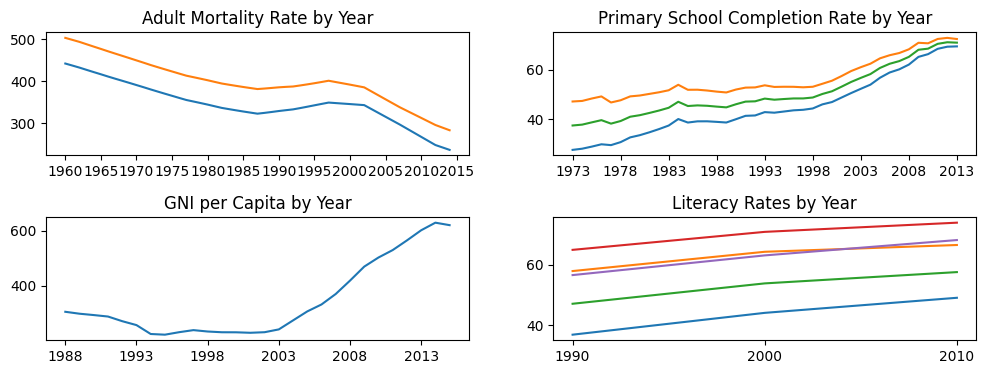

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 4))
# add more space between plots
plt.subplots_adjust(hspace=0.5)

# plot adult mortality rate
axes[0][0].plot(li_adult_mortality_df.index, li_adult_mortality_df)
axes[0][0].set_title('Adult Mortality Rate by Year')
# only display xticks for every five years
axes[0][0].set_xticks(range(0, len(li_adult_mortality_df.index), 5))
axes[0][0].set_xticklabels(li_adult_mortality_df.index[::5])

# plot primary school completion rate
axes[0][1].plot(primary_completion_df.transpose().index, primary_completion_df.transpose())
axes[0][1].set_title('Primary School Completion Rate by Year')
axes[0][1].set_xticks(range(0, len(primary_completion_df.transpose().index), 5))
axes[0][1].set_xticklabels(primary_completion_df.transpose().index[::5])

# plot GNI per capita by year
axes[1][0].plot(li_gni_df.index, li_gni_df)
axes[1][0].set_title('GNI per Capita by Year')
axes[1][0].set_xticks(range(0, len(li_gni_df.index), 5))
axes[1][0].set_xticklabels(li_gni_df.index[::5])

# plot literacy rates over time
axes[1][1].plot(li_lit_df.transpose().index, li_lit_df.transpose())
axes[1][1].set_title('Literacy Rates by Year')


# Conclusions So Far
My hypothesis was that increasing education levels in low income countries might have a positive effect on life expectancy (or, as seen in the plots above, a decreasing effect on mortality rates). It seems clear, however, that at least in a broad sense, any effects of education are overshadowed by general wealth levels. That is to say, there's a definite correlation between education levels (as measured by primary school completion and literacy rates) and a decrease in adulkt mortality rates. However, GNI per capita seems to correlate even better with mortality rates than the chosen education metrics. (Note the dip and then plateau in GNI matches the brief rise in mortality rate from roughly 1990 to 2000.) This means we can't tell if education itself has anything to do with decreasing adult mortality rates, or if increased education and lower mortality rates are both effects of increasing wealth. Alternatively, it could be the case that education is the root cause of both decreasing mortality and increasing wealth.

As far as predictions go, this is not necessarily a problem. We could build a model to predict mortality rate that takes these factors (and others) into consideration. When it comes to elucidating causes and suggesting interventions, however, we want to know what has the most impact.

# Next Direction to Pursue
## Dig Deeper into the metrics
I suspect that the data I've examined so far will prove fairly representative, but I want to take a look at similar indicators to see if they follow the same patterns. I'll look at education indicators and health indicators in different categories - adult, youth - and in more specific areas, such HIV rates (which may correlate with sexual health education) and malaria incidence.

In [ ]:
reproductive_ed_indicators = [
    '% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
    '% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)'
    'Comprehensive correct knowledge of HIV/AIDS, ages 15-24, female (2 prevent ways and reject 3 misconceptions',
    'Comprehensive correct knowledge of HIV/AIDS, ages 15-24, male (2 prevent ways and reject 3 misconceptions)',
    'Adolescent fertility rate (births per 1,000 women ages 15-19)',
    'Condom use with non regular partner, % adults(15-49), female',
    'Condom use with non regular partner, % adults(15-49), male',
    'Condom use, population ages 15-24, female (% of females ages 15-24)',
    'Condom use, population ages 15-24, male (% of males ages 15-24)',
    'Contraceptive prevalence, any methods (% of women ages 15-49)',
    'Contraceptive prevalence, modern methods (% of women ages 15-49)'
    ]
hiv_outcomes = [
    'Children (0-14) living with HIV',
    'Children (ages 0-14) newly infected with HIV',
    'Children orphaned by HIV/AIDS',
    'Prevalence of HIV, female (% ages 15-24)',
    'Prevalence of HIV, male (% ages 15-24)',
    'Prevalence of HIV, total (% of population ages 15-49)',
    'Adults (ages 15+) and children (0-14 years) living with HIV',
    'Adults (ages 15+) and children (ages 0-14) newly infected with HIV',
    'Adults (ages 15+) living with HIV',
    'Adults (ages 15+) newly infected with HIV'
    ]

In [ ]:
low_income_df = health_df[health_df['Country Name'] == 'Low income']
reproductive_ed_df = low_income_df[low_income_df['Indicator Name'].isin(reproductive_ed_indicators)].drop(columns=['Country Code', 'Indicator Code', 'Country Name', 'Unnamed: 60'])
reproductive_ed_df

,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
7245,% of females ages 15-49 having comprehensive c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7247,"Adolescent fertility rate (births per 1,000 wo...",136.759993,137.102667,137.211873,137.046052,137.106197,137.502729,137.921303,138.768762,139.603855,139.98735,139.702724,138.917943,137.541453,136.703001,136.153882,136.162927,136.513185,137.366497,137.617635,137.723087,137.474392,136.814409,135.960128,135.097493,134.329594,133.762507,133.371406,133.089148,132.97983,133.081601,133.396823,133.835874,134.497393,134.926561,135.087062,134.852624,134.282149,133.374771,131.546713,129.771454,128.178478,126.76369,125.507105,123.644451,121.794787,119.914759,117.989503,116.060414,113.697795,111.314814,108.910659,106.469905,104.015753,101.439417,98.868893,NaN
7328,"Comprehensive correct knowledge of HIV/AIDS, a...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7329,"Condom use with non regular partner, % adults(...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7330,"Condom use with non regular partner, % adults(...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7331,"Condom use, population ages 15-24, female (% o...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.691567,NaN,NaN,NaN,NaN
7332,"Condom use, population ages 15-24, male (% of ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.905997,NaN,NaN,NaN,NaN
7334,"Contraceptive prevalence, any methods (% of wo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.540813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.028581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.205868,NaN,NaN,NaN
7335,"Contraceptive prevalence, modern methods (% of...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.876084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.467485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.408446,NaN,NaN,NaN,NaN


In [ ]:
reproductive_ed_df = reproductive_ed_df.dropna(axis=0, thresh=2)

In [ ]:
reproductive_ed_df

,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
7247,"Adolescent fertility rate (births per 1,000 wo...",136.759993,137.102667,137.211873,137.046052,137.106197,137.502729,137.921303,138.768762,139.603855,139.98735,139.702724,138.917943,137.541453,136.703001,136.153882,136.162927,136.513185,137.366497,137.617635,137.723087,137.474392,136.814409,135.960128,135.097493,134.329594,133.762507,133.371406,133.089148,132.97983,133.081601,133.396823,133.835874,134.497393,134.926561,135.087062,134.852624,134.282149,133.374771,131.546713,129.771454,128.178478,126.76369,125.507105,123.644451,121.794787,119.914759,117.989503,116.060414,113.697795,111.314814,108.910659,106.469905,104.015753,101.439417,98.868893,NaN
7331,"Condom use, population ages 15-24, female (% o...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.691567,NaN,NaN,NaN,NaN
7332,"Condom use, population ages 15-24, male (% of ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.905997,NaN,NaN,NaN,NaN
7334,"Contraceptive prevalence, any methods (% of wo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.540813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.028581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.205868,NaN,NaN,NaN
7335,"Contraceptive prevalence, modern methods (% of...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.876084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.467485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.408446,NaN,NaN,NaN,NaN


<ipython-input-159-974a99957b26>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  reproductive_ed_df.set_index('Indicator Name').transpose().fillna(method='ffill').plot(kind='line', figsize=(10, 4))


Text(0, 0.5, 'Percentage')

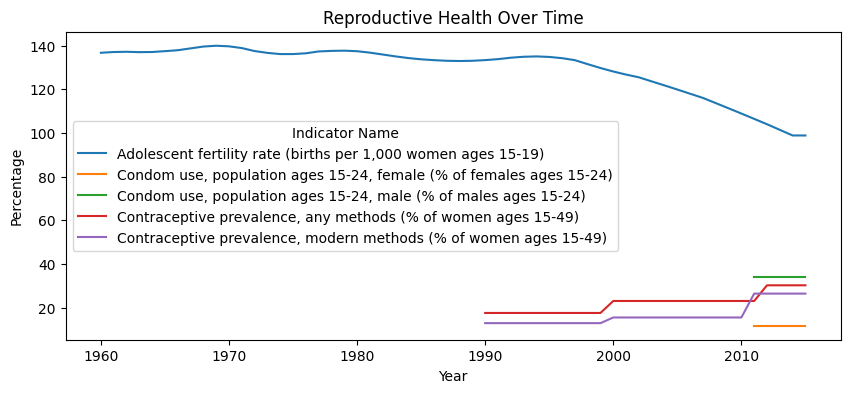

In [ ]:
reproductive_ed_df.set_index('Indicator Name').transpose().fillna(method='ffill').plot(kind='line', figsize=(10, 4))
plt.title('Reproductive Health Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage')

In [ ]:
hiv_df = low_income_df[low_income_df['Indicator Name'].isin(hiv_outcomes)].drop(columns=['Country Code', 'Indicator Code', 'Country Name', 'Unnamed: 60'])
hiv_df

,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
7248,Adults (ages 15+) and children (0-14 years) li...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7249,Adults (ages 15+) and children (ages 0-14) new...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7250,Adults (ages 15+) living with HIV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7251,Adults (ages 15+) newly infected with HIV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7318,Children (0-14) living with HIV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7319,Children (ages 0-14) newly infected with HIV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7320,Children orphaned by HIV/AIDS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7521,"Prevalence of HIV, female (% ages 15-24)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.224779,2.407948,2.547586,2.641877,2.686023,2.716761,2.684197,2.620913,2.542478,2.453328,2.350828,2.236920,2.127619,2.011297,1.919602,1.808118,1.744136,1.675096,1.602150,1.562193,1.493242,1.441948,1.382464,1.334567,1.274741,1.209663
7522,"Prevalence of HIV, male (% ages 15-24)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.325914,1.367925,1.405748,1.409570,1.413505,1.397351,1.371812,1.317340,1.286421,1.224673,1.180797,1.140536,1.093549,1.052651,0.999282,0.962080,0.940658,0.912210,0.894158,0.877100,0.852763,0.828928,0.810081,0.785283,0.766241,0.735481
7523,"Prevalence of HIV, total (% of population ages...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.256099,3.610986,3.912907,4.175482,4.370894,4.521461,4.614666,4.671523,4.673658,4.640440,4.584922,4.485571,4.373001,4.231957,4.080765,3.939059,3.821414,3.699975,3.620651,3.545076,3.466136,3.378977,3.294329,3.224910,3.136248,3.047685


<ipython-input-161-7c7fa8affc6d>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hiv_df = hiv_df.set_index('Indicator Name').dropna(thresh=5).transpose().fillna(method='ffill')


Text(0, 0.5, 'Percentage')

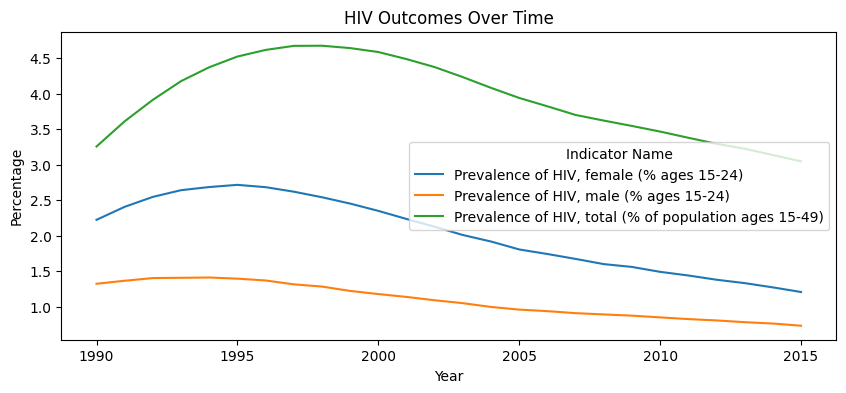

In [ ]:
hiv_df = hiv_df.set_index('Indicator Name').dropna(thresh=5).transpose().fillna(method='ffill')
hiv_df.plot(kind='line', figsize=(10, 4))
plt.title('HIV Outcomes Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage')

# Reproductive Health
Here we see that higher contraceptive use, regardless of the specific method, is correlated with lower adolescent birth rates and lower prevalence of HIV over time.

Let's also look at:
* malaria
* spending on education
* education beyond primary
* separate countries that fall into low income level



In [ ]:
health_df[health_df['Indicator Name'] == 'GNI per capita, Atlas method (current US$)'].describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
count,0.0,0.0,96.000000,97.000000,99.000000,101.000000,102.000000,113.000000,119.000000,121.000000,127.000000,127.000000,139.000000,140.000000,140.000000,139.000000,139.000000,142.000000,144.000000,149.000000,149.000000,150.000000,161.000000,165.000000,167.000000,167.000000,170.000000,172.000000,174.000000,177.000000,177.000000,178.000000,193.000000,199.000000,202.000000,211.000000,212.000000,219.000000,219.000000,219.000000,223.000000,224.000000,227.000000,229.000000,235.000000,235.000000,236.000000,237.000000,235.000000,233.000000,231.000000,231.000000,230.000000,229.000000,223.000000,206.000000,0.0
mean,NaN,NaN,568.409366,594.748001,638.088124,679.738614,729.651406,785.433792,814.924602,860.945168,949.580444,1037.135611,1371.686716,1671.577691,2073.135428,2450.710883,2668.656484,2803.989555,3109.120036,3665.133712,4306.690414,4468.695542,4158.647678,3769.501917,3726.076705,3757.350537,4126.535893,4863.507550,5803.139047,6096.708842,6248.918340,6494.600204,6611.551844,6538.340962,6696.448974,7005.408291,7252.230932,7357.511799,7113.311585,7105.995897,7335.098957,7339.363790,7253.243767,7913.917784,9305.939366,10628.359406,11500.054904,13127.764454,13949.106040,12829.871170,12547.546022,12921.857541,13778.518847,14244.089446,13445.549988,13349.573456,NaN
std,NaN,NaN,697.905637,728.604575,779.886733,840.742457,918.954642,990.576369,1039.758661,1106.306021,1188.803764,1300.655531,1959.429172,2440.119258,2983.047578,3482.551931,3801.658323,4034.869341,4520.354033,5400.175572,6333.830147,6410.516000,5850.420201,5256.846881,5149.518505,5207.149971,5912.756729,7299.114031,9148.325232,9652.678801,10118.609204,10511.563752,11213.035510,11084.496264,11487.777090,12128.562433,12720.439429,12646.828985,12093.986995,12024.952118,12275.121322,11902.179120,11631.899265,12750.253784,15074.301950,17191.802190,18367.330537,21404.892707,22797.358039,19032.675488,18166.949875,18439.825194,19215.261652,19942.573805,18742.108905,17795.774275,NaN
min,NaN,NaN,40.000000,40.000000,40.000000,40.000000,40.000000,50.000000,50.000000,50.000000,60.000000,60.000000,60.000000,70.000000,80.000000,100.000000,120.000000,120.000000,120.000000,130.000000,140.000000,160.000000,140.000000,140.000000,150.000000,160.000000,150.000000,150.000000,160.000000,160.000000,130.000000,110.000000,130.000000,170.000000,150.000000,140.000000,130.000000,120.000000,120.000000,100.000000,120.000000,120.000000,120.000000,80.000000,90.000000,120.000000,130.000000,160.000000,170.000000,180.000000,200.000000,220.000000,240.000000,250.000000,270.000000,260.000000,NaN
25%,NaN,NaN,122.202963,129.315534,135.433595,143.958896,150.000000,160.000000,165.000000,172.553012,192.241638,198.749840,221.210101,256.121240,327.500000,370.000000,400.000000,432.781414,459.593774,537.683672,630.000000,694.287220,610.000000,550.000000,480.000000,469.455169,502.500000,532.500000,542.500000,520.000000,550.000000,510.000000,560.000000,548.751622,502.500000,544.648557,563.890471,600.000000,585.000000,605.000000,590.000000,587.500000,575.000000,640.000000,752.778710,900.000000,968.150425,1028.205026,1183.682048,1260.000000,1305.000000,1460.000000,1700.000000,1830.000000,1850.000000,1950.000000,NaN
50%,NaN,NaN,255.000000,250.000000,270.000000,280.000000,290.000000,300.000000,300.000000,330.000000,350.000000,380.000000,480.000000,560.000000,720.000000,910.000000,980.000000,1020.000000,1210.000000,1370.000000,1700.000000,1835.000000,1740.000000,1400.000000,1360.000000,1380.000000,1450.000000,1645.000000,1825.000000,1890.000000,1610.000000,1710.000000,1600.000000,1590.000000,1735.000000,1903.987945,1962.308568,2110.000000,1961.389689,1960.000000,1870.534302,1878.602078,1960.000000,2190.000000,2590.000000,3070.000000,3495.000

In [ ]:
gni_df = health_df[health_df['Indicator Name'] == 'GNI per capita, Atlas method (current US$)'].drop(columns=['Country Code', 'Indicator Code', 'Indicator Name', 'Unnamed: 60'])
gni_df

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
118,Arab World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2132.042059,2167.770774,2274.652464,2351.262733,2338.684858,2324.350804,2430.745934,2511.953609,2506.305853,2685.369335,3081.240066,3554.755881,4091.429697,4708.275460,5516.011131,5599.283158,5822.417372,6068.123505,7024.379798,7523.869885,7540.195551,7060.619946
463,Caribbean small states,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,639.075228,669.964732,719.736417,761.019060,908.151354,1007.251750,1185.160933,1494.405942,1594.069002,1728.935584,1905.730396,2051.829298,2241.989233,2544.321969,2736.332350,2583.505380,2510.625180,2492.510319,2452.680032,2548.709681,2764.129219,2843.049402,2894.375147,2882.002573,2906.108648,2961.302205,3026.794297,3253.825081,3541.920352,3633.163598,3841.453950,4206.557160,4575.053414,4707.350101,4944.532209,5415.106083,6037.308506,6596.769555,7331.497479,7992.807870,8795.144603,8450.681246,8431.488240,8268.068301,8765.208504,9338.394678,9502.859278,9476.994987
808,Central Europe and the Baltics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2235.379022,2435.077906,2731.934302,3151.982642,3598.714747,3819.654595,3873.329817,3919.568999,4099.290940,4183.400420,4433.073980,5208.915226,6376.034351,7718.526894,8839.708774,10315.244459,12295.776208,12605.499279,12724.330357,12887.855077,13057.316814,13394.374623,13506.423469,13147.787643
1153,Early-demographic dividend,NaN,NaN,NaN,NaN,NaN,182.258866,186.578154,190.623888,196.533152,210.061183,221.275728,234.537160,252.469746,300.221520,385.359126,465.798083,507.110062,520.347472,560.645567,652.203839,771.559629,871.162801,849.293059,796.161196,760.056108,752.951913,770.389338,812.062146,846.145231,821.988861,857.497805,889.847129,983.925164,1042.713357,1091.896370,1107.108162,1160.859328,1200.498954,1167.390844,1179.990714,1241.760877,1255.426292,1221.230653,1303.561798,1489.429964,1717.652739,1924.622462,2189.077070,2450.037299,2545.357068,2766.034056,2986.262816,3270.470096,3389.328379,3399.202028,3324.105287
1498,East Asia & Pacific,NaN,NaN,141.459413,154.812276,173.261422,191.875052,211.465850,222.662857,241.730813,275.276850,300.884753,329.586055,388.136325,493.234295,598.246770,697.960042,723.488123,783.524424,926.831266,1123.583808,1277.361945,1329.105202,1283.088265,1247.755170,1284.661449,1377.369646,1577.880123,1917.279211,2453.573465,2640.083684,2752.563246,2854.127601,3052.421781,3315.179490,3626.604123,4058.312789,4247.349324,4138.840196,3608.691010,3572.466815,3762.134035,3847.653060,3807.346351,3995.339086,4491.418894,4909.583186,5198.969519,5578.603341,6090.892128,6429.489035,7232.469655,8005.838669,8968.093414,9547.433228,9735.063458,9602.441917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87403,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4170.000000,4510.000000,4830.000000,5210.000000,4690.000000,4930.000000,5440.000000,6620.000000,8000.000000,8620.000000,7960.000000,8300.000000,8640.000000,8930.000000,9850.000000,11550.000000,12590.000000,13660.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87748,West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1520.000000,1740.000000,1940.000000,1960.000000,1580.000000,1390.000000,1300.000000,1390.000000,1480.

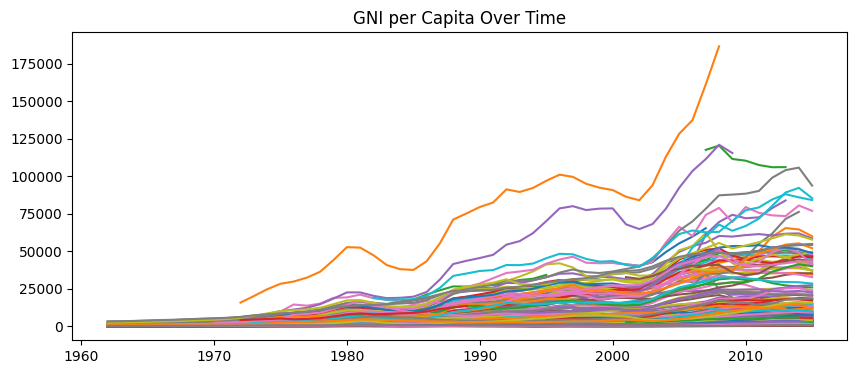

In [ ]:
# let's plot gni_df
gni_df.set_index('Country Name').transpose().plot(kind='line', figsize=(10, 4))
plt.title('GNI per Capita Over Time')
# no legend
plt.legend().set_visible(False)

That's not very informative...

# Let's Look at Individual Low-Income Countries
We'll create a threshold, based on an average of each country's GNI per capita over time, and examine the data and trends for all countries under that threshold.

In [ ]:
# let's find average gni for every Country Name in gni_df
gni_df[gni_df['Country Name'] == 'Low income']

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
7363,Low income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,304.687725,297.667978,292.782192,287.426744,270.499683,256.288883,223.931746,221.467935,230.524079,238.010724,232.994008,230.280088,230.10929,228.35953,230.437432,240.657171,273.364537,306.067003,331.341535,369.467833,417.895565,468.865489,501.951091,529.01922,564.120741,601.01478,628.65275,619.629692


In [ ]:
avg_gni = gni_df.bfill(axis=1)
avg_gni = avg_gni.set_index('Country Name')
avg_gni = avg_gni.ffill(axis=1).sort_values(by='Country Name')
avg_gni = avg_gni.ffill(axis=1).dropna()
avg_gni = avg_gni.mean(axis=1)
avg_gni.describe()

<ipython-input-166-f961a6a06cd2>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  avg_gni = avg_gni.ffill(axis=1).sort_values(by='Country Name')


,0
count,243.000000
mean,6357.567114
std,10066.226179
min,153.214286
25%,765.579928
50%,2287.500000
75%,6766.472868
max,75830.535714


In [ ]:
avg_gni

,0
Country Name,
Afghanistan,275.892857
Albania,1425.714286
Algeria,1949.642857
Andorra,17749.107143
Angola,1195.714286
...,...
West Bank and Gaza,1692.857143
World,4114.497937
"Yemen, Rep.",601.250000


I can use the info above to create my own list of low income countries and see if anything interesting shows up in the numbers for that group that is hidden in the aggregate view where country name = 'Low income'. Let's use the average value for the 'Low income' Country Name as our threshold, but let's bump it up a little bit to include a few more countries.

In [ ]:
avg_gni['Low income']

324.26378085791856

In [ ]:
threshhold = avg_gni['Low income'] + 150

In [ ]:
# build a custom list of low income countries
low_income_countries = avg_gni[avg_gni < threshhold].index.tolist()
low_income_countries.remove('Least developed countries: UN classification')  # remove the aggregate names
low_income_countries.remove('Low income')
low_income_countries.remove('Heavily indebted poor countries (HIPC)')
low_income_countries

['Afghanistan',
 'Bangladesh',
 'Benin',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Central African Republic',
 'Chad',
 'Congo, Dem. Rep.',
 'Eritrea',
 'Ethiopia',
 'Gambia, The',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'India',
 'Kenya',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mozambique',
 'Nepal',
 'Niger',
 'Rwanda',
 'Sierra Leone',
 'South Asia',
 'South Asia (IDA & IBRD)',
 'Tajikistan',
 'Tanzania',
 'Togo',
 'Uganda',
 'Vietnam']

In [ ]:
# filter the main df to include only those countries in the new list
new_df = health_df[health_df['Country Name'].isin(low_income_countries)]
new_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
11730,South Asia,SAS,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11731,South Asia,SAS,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11732,South Asia,SAS,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,114.641709,114.910064,115.178945,115.604518,115.954006,116.232073,116.46524,116.642104,116.62504,116.682516,116.835414,116.847752,116.942275,116.61938,116.365631,116.162173,116.150798,116.148401,116.385223,116.5737,116.708718,116.76831,116.782348,115.784439,114.750549,113.688788,112.597627,111.48444,108.709232,105.962887,103.255728,100.580161,97.934867,94.647699,91.346904,88.018435,84.665143,81.283875,78.051401,74.815266,71.586174,68.375864,65.168941,62.340353,59.521119,56.710693,53.888627,51.074158,48.648219,46.230878,43.822053,41.428371,39.028432,36.992603,34.941131,NaN,NaN
11733,South Asia,SAS,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11734,South Asia,SAS,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87280,Vietnam,VNM,Use of insecticide-treated bed nets (% of unde...,SH.MLR.NETS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,NaN,NaN,NaN,NaN,13.000000,5.000000,NaN,NaN,NaN,NaN,9.400000,NaN,NaN,NaN,NaN,NaN
87281,Vietnam,VNM,Use of Intermittent Preventive Treatment of ma...,SH.MLR.SPF2.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87282,Vietnam,VNM,Vitamin A supplementation coverage rate (% of ...,SN.ITK.VITA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,98.000000,98.000000,99.000000,95.000000,99.000000,98.000000,NaN,94.000000,NaN,NaN
87283,Vietnam,VNM,Wanted fertility rate (births per woman),SP.DYN.WFRT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.900000,NaN,NaN,NaN,NaN,1.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# build a df of education indicators for the low income countries
new_ed_df = new_df[new_df['Indicator Name'].isin(ed_indicators)]
# new_ed_df

In [ ]:
# new_ed_df.info()
# there's no non-null data in the columns 1960-1969, or in "unnamed", so let's drop those
new_ed_df = new_ed_df.drop(columns=['Country Code', 'Indicator Code']).dropna(axis=1, how='all')
# new_ed_df

In [ ]:
female_youth_hiv_ed_df = new_ed_df[new_ed_df['Indicator Name'] == 'Comprehensive correct knowledge of HIV/AIDS, ages 15-24, female (2 prevent ways and reject 3 misconceptions)'][['Country Name', '2005', '2006', '2010', '2014']].dropna(thresh=2)
# female_youth_hiv_ed_df
# 2005, 2006, 2010, 2014

In [ ]:
male_youth_hiv_ed_df = new_ed_df[new_ed_df['Indicator Name'] == 'Comprehensive correct knowledge of HIV/AIDS, ages 15-24, male (2 prevent ways and reject 3 misconceptions)'][['Country Name', '2005', '2006', '2010', '2014']].dropna(thresh=2)
# male_youth_hiv_ed_df

In [ ]:
youth_hiv_ed_df = male_youth_hiv_ed_df.merge(female_youth_hiv_ed_df, how='outer', on="Country Name", suffixes=("_male", "_female"))
youth_hiv_ed_df

,Country Name,2005_male,2006_male,2010_male,2014_male,2005_female,2006_female,2010_female,2014_female
0,Bangladesh,NaN,NaN,NaN,NaN,NaN,15.8,NaN,12.7
1,Benin,NaN,34.8,NaN,31.3,NaN,15.9,NaN,21.6
2,Burkina Faso,NaN,NaN,35.7,NaN,NaN,19.0,31.1,NaN
3,Burundi,NaN,NaN,46.5,NaN,30.4,NaN,44.5,NaN
4,Cambodia,45.2,NaN,43.7,45.9,50.1,NaN,44.4,37.6
5,Central African Republic,NaN,26.1,25.0,NaN,NaN,17.3,17.4,NaN
6,Chad,NaN,NaN,NaN,NaN,NaN,NaN,10.1,NaN
7,"Congo, Dem. Rep.",NaN,NaN,NaN,24.9,NaN,NaN,15.2,18.6
8,Eritrea,NaN,NaN,33.8,NaN,NaN,NaN,24.7,NaN
9,Ethiopia,33.3,NaN,NaN,NaN,19.9,NaN,NaN,NaN


In [ ]:
big_hiv_df = new_df[new_df['Indicator Name'].isin(['Prevalence of HIV, female (% ages 15-24)', 'Prevalence of HIV, male (% ages 15-24)'])].dropna(thresh=5).drop(columns=['Country Code', 'Indicator Code']).dropna(axis=1, thresh=5)[['Country Name', '2005', '2006', '2010', '2014']].merge(youth_hiv_ed_df, how='inner', on="Country Name")

,Country Name,2005,2006,2010,2014,2005_male,2006_male,2010_male,2014_male,2005_female,2006_female,2010_female,2014_female
0,Bangladesh,0.1,0.1,0.1,0.1,NaN,NaN,NaN,NaN,NaN,15.8,NaN,12.7
1,Bangladesh,0.1,0.1,0.1,0.1,NaN,NaN,NaN,NaN,NaN,15.8,NaN,12.7
2,Benin,0.6,0.5,0.4,0.4,NaN,34.8,NaN,31.3,NaN,15.9,NaN,21.6
3,Benin,0.3,0.3,0.2,0.2,NaN,34.8,NaN,31.3,NaN,15.9,NaN,21.6
4,Burkina Faso,0.4,0.4,0.4,0.4,NaN,NaN,35.7,NaN,NaN,19.0,31.1,NaN
5,Burkina Faso,0.3,0.3,0.3,0.3,NaN,NaN,35.7,NaN,NaN,19.0,31.1,NaN
6,Burundi,0.7,0.6,0.3,0.3,NaN,NaN,46.5,NaN,30.4,NaN,44.5,NaN
7,Burundi,0.4,0.3,0.2,0.3,NaN,NaN,46.5,NaN,30.4,NaN,44.5,NaN
8,Cambodia,0.7,0.6,0.3,0.2,45.2,NaN,43.7,45.9,50.1,NaN,44.4,37.6
9,Cambodia,0.3,0.3,0.1,0.1,45.2,NaN,43.7,45.9,50.1,NaN,44.4,37.6


In [ ]:
df = new_df[new_df['Indicator Name'] == 'Prevalence of HIV, female (% ages 15-24)'][['Country Name', '2005', '2006', '2010', '2014']].merge(female_youth_hiv_ed_df, how='inner', on="Country Name", suffixes=('_hiv', '_ed')).dropna(axis=1, thresh=3)

In [ ]:
import pandas as pd

# Assuming your DataFrame is named df
df_melted_hiv = df.melt(id_vars=['Country Name'], value_vars=['2005_hiv', '2006_hiv', '2010_hiv', '2014_hiv'],
                        var_name='Year', value_name='HIV')
df_melted_hiv['Year'] = df_melted_hiv['Year'].str.extract('(\d+)')

df_melted_ed = df.melt(id_vars=['Country Name'], value_vars=['2005_ed', '2006_ed', '2010_ed', '2014_ed'],
                       var_name='Year', value_name='Education')
df_melted_ed['Year'] = df_melted_ed['Year'].str.extract('(\d+)')

# Merge the two melted DataFrames
df_combined = pd.merge(df_melted_hiv, df_melted_ed, on=['Country Name', 'Year'])


In [ ]:
df_combined_cleaned = df_combined.dropna(subset=['HIV', 'Education'])

df_combined_cleaned

,Country Name,Year,HIV,Education
3,Burundi,2005,0.7,30.4
4,Cambodia,2005,0.7,50.1
11,Guinea,2005,0.8,16.9
20,Rwanda,2005,1.4,50.9
21,Sierra Leone,2005,1.7,17.1
22,Tajikistan,2005,0.1,2.3
23,Tanzania,2005,2.7,46.5
25,Uganda,2005,3.1,29.5
26,Vietnam,2005,0.3,42.3
27,Bangladesh,2006,0.1,15.8


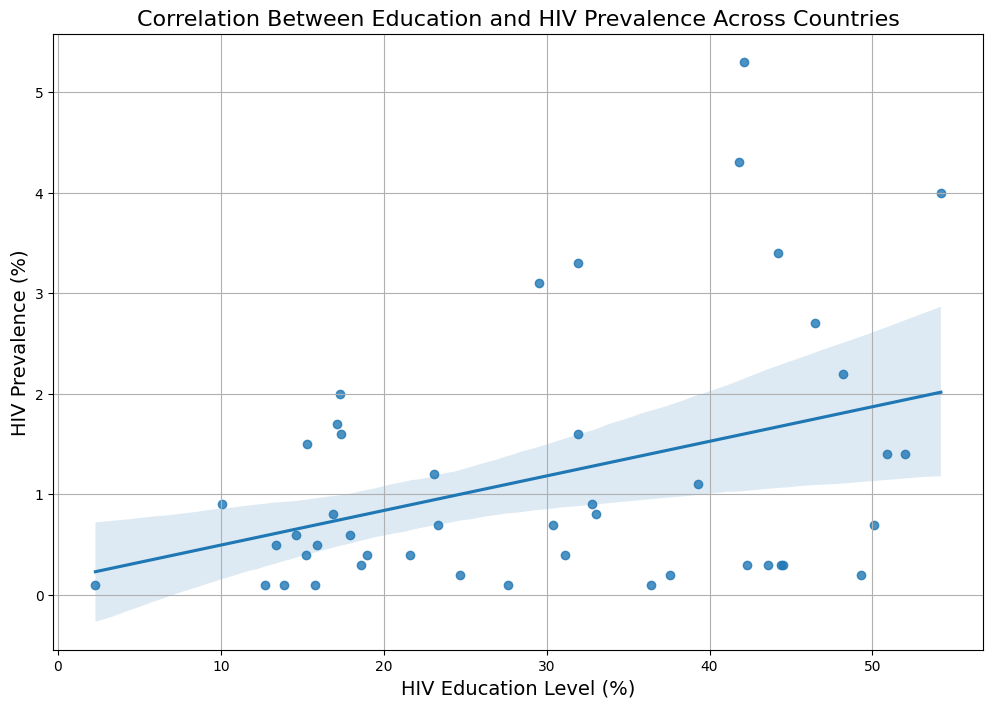

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot with all countries combined
plt.figure(figsize=(12, 8))
# sns.scatterplot(data=df_combined_cleaned, x="Education", y="HIV", hue="Country Name", palette="tab20", alpha=0.8)
sns.regplot(data=df_combined_cleaned, x="Education", y="HIV", scatter=True)

# Add labels and title
plt.title("Correlation Between Education and HIV Prevalence Across Countries", fontsize=16)
plt.xlabel("HIV Education Level (%)", fontsize=14)
plt.ylabel("HIV Prevalence (%)", fontsize=14)
# plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



In [ ]:
adult_lit = new_df[new_df['Indicator Name'] == 'Literacy rate, adult total (% of people ages 15 and above)']
adult_lit

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
11883,South Asia,SAS,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.47641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.023860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.726930,NaN,NaN,NaN,NaN,NaN,NaN
12228,South Asia (IDA & IBRD),TSA,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.47641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.023860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.726930,NaN,NaN,NaN,NaN,NaN,NaN
14298,Afghanistan,AFG,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.157681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.741117,NaN,NaN,NaN,38.168041,NaN
19473,Bangladesh,BGD,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.227230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.319302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.485500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.575218,61.493832,NaN
21198,Benin,BEN,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.482790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.245251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.657848,NaN,NaN,NaN,28.702110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.447140,NaN
24648,Burkina Faso,BFA,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.68515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.569230,NaN,NaN,NaN,NaN,12.848170,NaN,NaN,NaN,NaN,NaN,NaN,21.82292,NaN,23.553720,22.472580,28.729210,NaN,NaN,NaN,NaN,NaN,NaN,34.599411,37.746700,NaN
24993,Burundi,BDI,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.508551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.38472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.303619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.947868,NaN,NaN,NaN,NaN,NaN,NaN,85.496094,NaN
25683,Cambodia,KHM,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.335030,NaN,NaN,NaN,NaN,NaN,73.609947,NaN,NaN,NaN,77.586540,73.900032,NaN,NaN,NaN,NaN,NaN,78.345940,NaN
27063,Central African Republic,CAF,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.23617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.62442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.645168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.752609,NaN,NaN,NaN,NaN,36.752609,NaN
27408,Chad,TCD,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.89465,NaN,NaN,NaN,NaN,NaN,NaN,25.654209,NaN,NaN,NaN,28.381430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.049671,40.018242,NaN


In [ ]:
ed_indicators

['Comprehensive correct knowledge of HIV/AIDS, ages 15-24, female (2 prevent ways and reject 3 misconceptions)',
 'Comprehensive correct knowledge of HIV/AIDS, ages 15-24, male (2 prevent ways and reject 3 misconceptions)',
 'Literacy rate, adult female (% of females ages 15 and above)',
 'Literacy rate, adult male (% of males ages 15 and above)',
 'Literacy rate, adult total (% of people ages 15 and above)',
 'Literacy rate, youth male (% of males ages 15-24)',
 'Literacy rate, youth total (% of people ages 15-24)',
 'Primary completion rate, female (% of relevant age group)',
 'Primary completion rate, male (% of relevant age group)',
 'Primary completion rate, total (% of relevant age group)',
 'Public spending on education, total (% of GDP)',
 'Ratio of school attendance of orphans to school attendance of non-orphans ages 10-14',
 'Ratio of young literate females to males (% ages 15-24)',
 'School enrollment, primary (% gross)',
 'School enrollment, primary (% net)',
 'School enrol